# 직원 이직 여부 예측
![](https://github.com/Jangrae/img/blob/master/employee.png?raw=true)

## 데이터 정보
- Attrition: 이직여부 (1-Yes 0-No)	
- Age: 나이	
- BusinessTravel: 출장 빈도
- Department: 현재 부서	
- DistanceFromHome: 집과 직장 사이의 거리 (마일)	
- Education: 교육수준 (1-Below College 2-College 3-Bachelor 4- Master 5-Doctor)
- EducationField: 전공	
- EmployeeNumber: 사번	
- EnvironmentSatisfaction: 근무환경에 대한 만족도 (1-Low 2-Good 3-Excellent 4-Outstanding)
- Gender: 성별	
- JobInvolvement: 직무 적극성, 참여도 (1-Low 2-Medium 3-High 4-Very High)
- JobRole: 직무	
- JobSatisfaction: 직무 만족도 (1-Low 2-Medium 3-High 4-Very High)
- MaritalStatus: 결혼상태	
- MonthlyIncome: 월급	
- NumCompaniesWorked: 현재까지 근무한 회사 수	
- OverTime: 야근 여부	
- PercentSalaryHike: 전년대비 급여 인상율 (%)	
- RelationshipSatisfaction: 동료와의 관계 만족도 (1-Low 2-Medium 3-High 4-Very High)
- StockOptionLevel: 스톡옵션 수준 (0 ~ 3)	
- TotalWorkingYears: 총 근무 연수	
- TrainingTimesLastYear: 전년 교육훈련 횟수	
- WorkLifeBalance: 워라밸, 일과 삶의 균형도 (1-Bad 2-Good 3-Better 4-Best)
- YearsAtCompany: 현 직장 근무 연수	
- YearsInCurrentRole: 현 직무 연수	
- YearsWithCurrManager: 현 팀장과 근무한 연수

## 데이터셋 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Attrition_NA.CSV'

data = pd.read_csv(path)
# 값 변경: Yes/No --> 1/0
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

In [3]:
target = 'Attrition'

In [4]:
data[target]

0       0
1       0
2       0
3       0
4       0
       ..
1245    0
1246    0
1247    0
1248    0
1249    0
Name: Attrition, Length: 1250, dtype: int64

## 데이터 전처리

* 주석을 상세하게 작성해주세요

<details><summary>Hint</summary>

- x, y 구분 필요
- train, test 구분 필요
- 데이터 타입 전처리 필요
- 데이터 인코딩 필요
- null값 확인 필요

In [5]:
# 컬럼 확인 및 결측치 확인.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1250 non-null   int64  
 1   Age                       1250 non-null   int64  
 2   BusinessTravel            1250 non-null   object 
 3   Department                1250 non-null   object 
 4   DistanceFromHome          1196 non-null   float64
 5   Education                 1250 non-null   int64  
 6   EducationField            1250 non-null   object 
 7   EmployeeNumber            1250 non-null   int64  
 8   EnvironmentSatisfaction   1250 non-null   int64  
 9   Gender                    1250 non-null   object 
 10  JobInvolvement            1250 non-null   int64  
 11  JobRole                   1250 non-null   object 
 12  JobSatisfaction           1250 non-null   int64  
 13  MaritalStatus             1250 non-null   object 
 14  MonthlyI

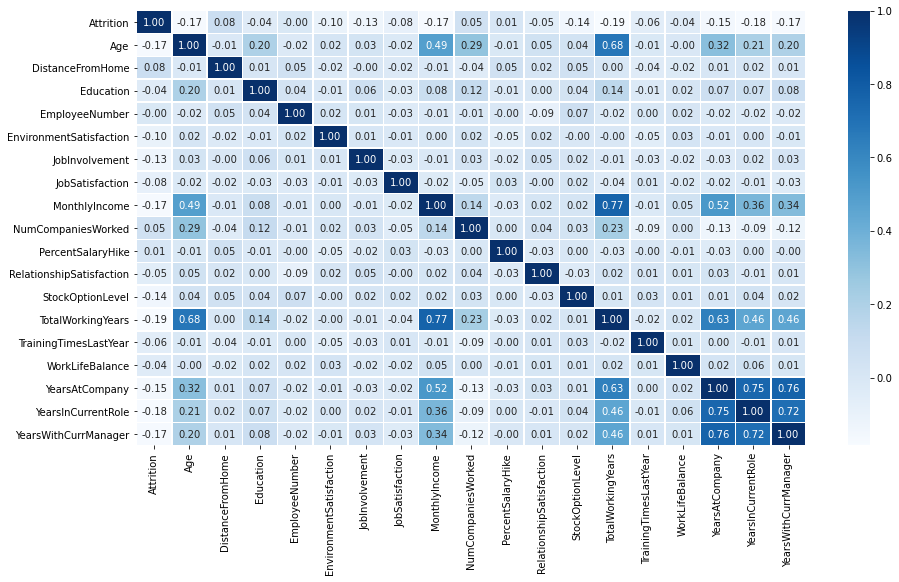

In [6]:
# 상관관계 시각화.
plt.figure(figsize=(15, 8))
sns.heatmap(data = data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

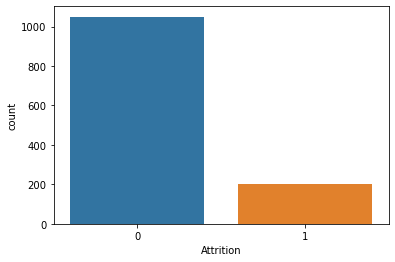

In [7]:
# 이직자, 비 이직자 수 시각화.
sns.countplot(data=data, x=target)
plt.show()

In [8]:
# x, y 구분
x = data.drop(target,axis=1)
y = data[target]

In [9]:
x.shape, y.shape

((1250, 25), (1250,))

# 사용하지 않을 변수 드랍.

### Locally connected layer를 구성하기 위한 feature 설정이후 남는 변수들 드랍.

In [10]:
x.drop(['DistanceFromHome','EmployeeNumber','NumCompaniesWorked',
       'StockOptionLevel'],axis=1,inplace=True)
x

,Age,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,...,MonthlyIncome,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,33,Travel_Rarely,Research & Development,3,Medical,3,Male,3,Research Director,3,...,11691,No,11,4,14,3,4,13,9,7
1,35,Travel_Frequently,Research & Development,2,Life Sciences,3,Male,3,Manufacturing Director,4,...,9362,No,11,3,10,2,3,2,2,2
2,42,Travel_Rarely,Research & Development,3,Medical,3,Male,3,Research Director,1,...,13348,No,13,2,18,3,4,13,7,7
3,46,Travel_Rarely,Sales,3,Marketing,3,Female,3,Manager,1,...,17048,No,23,1,28,2,3,26,15,9
4,39,Travel_Frequently,Sales,3,Life Sciences,3,Male,3,Sales Executive,4,...,4127,No,18,4,7,6,3,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,27,Travel_Rarely,Research & Development,3,Other,4,Male,2,Laboratory Technician,1,...,4066,No,11,1,7,3,3,7,7,7
1246,29,Travel_Rarely,Research & Development,3,Life Sciences,3,Male,4,Research Scientist,3,...,2451,No,18,1,5,2,2,1,0,0
1247,29,Non-Travel,Sales,3,Life Sciences,4,Male,3,Sales Executive,3,...,4649,No,14,1,4,3,2,4,3,2
1248,43,Travel_Rarely,Sales,3,Marketing,4,Female,3,Manager,4,...,16064,Yes,22,3,22,3,3,17,13,9


EmployeeNumber(사번) - 말 그대로 자기에게 부여된 번호인데 번호가지고 이직을 결심하는 이유는 없을거라 생각했기에 제외.

보조강사: 이런 설명 좋슴다.

NumCompaniesWorked(현재까지 근무한 회사 수) - 

근무한 회사 수가 많다면 연령도 높다고 판단할 수 있겠으나,   
연령과 관련된 로컬을 짰는데 1달 후 이직과 같은 케이스를 생각해본다면  
연령과의 관계성이 애매한 지표라 판단해 제외.

StockOptionLevel(스톡옵션 수준) - 제가 부족해서 이 옵션의 뜻을 몰라 제외했습니다...

DistanceFromHome(집과 직장 사이의 거리) - 이 변수와 묶일 다른 변수를 찾지 못했습니다...

In [11]:
x.shape

(1250, 21)

DistanceFromHome / NumCompaniesWorked에 결측치 확인 가능.

In [12]:
# 범주형 데이터셋 가변수화
cols = ['BusinessTravel','Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 
        'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 
        'RelationshipSatisfaction', 'WorkLifeBalance']
x = pd.get_dummies(x,columns=cols, drop_first=False)

In [13]:
x.shape

(1250, 61)

In [14]:
# 수지형 데이터셋 정규화
cols=['Age','MonthlyIncome',
      'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
      'YearsInCurrentRole', 'YearsWithCurrManager']

for v in cols:
    x[cols] = (x[cols] - x[cols].min()) / (x[cols].max() - x[cols].min())
# 확인
x

,Age,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,...,OverTime_No,OverTime_Yes,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0.357143,0.562507,0.000000,0.350,0.500000,0.325,0.500000,0.411765,0,0,...,1,0,0,0,0,1,0,0,0,1
1,0.404762,0.439863,0.000000,0.250,0.333333,0.050,0.111111,0.117647,0,1,...,1,0,0,0,1,0,0,0,1,0
2,0.571429,0.649763,0.142857,0.450,0.500000,0.325,0.388889,0.411765,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0.666667,0.844602,0.857143,0.700,0.333333,0.650,0.833333,0.529412,0,0,...,1,0,1,0,0,0,0,0,1,0
4,0.500000,0.164192,0.500000,0.175,1.000000,0.050,0.055556,0.117647,0,1,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,0.214286,0.160979,0.000000,0.175,0.500000,0.175,0.388889,0.411765,0,0,...,1,0,1,0,0,0,0,0,1,0
1246,0.261905,0.075935,0.500000,0.125,0.333333,0.025,0.000000,0.000000,0,0,...,1,0,1,0,0,0,0,1,0,0
1247,0.261905,0.191680,0.214286,0.100,0.500000,0.100,0.166667,0.117647,1,0,...,1,0,1,0,0,0,0,1,0,0
1248,0.595238,0.792786,0.785714,0.550,0.500000,0.425,0.722222,0.529412,0,0,...,0,1,0,0,1,0,0,0,1,0


In [15]:
x.shape

(1250, 61)

In [16]:
# 결측치의 경우 이전에 드랍시켰기에 패스.

In [17]:
# 결측치 확인
x.isna().sum()

Age                           0
MonthlyIncome                 0
PercentSalaryHike             0
TotalWorkingYears             0
TrainingTimesLastYear         0
                             ..
RelationshipSatisfaction_4    0
WorkLifeBalance_1             0
WorkLifeBalance_2             0
WorkLifeBalance_3             0
WorkLifeBalance_4             0
Length: 61, dtype: int64

In [18]:
# 학습, 테스트셋 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2022)

## 모델링

1. 전처리에서 제외한 feature를 제외한, 다른 feature는 반드시 모두 사용하셔야 합니다.
2. locally connected layer를 최소 4개 이상 만드세요.
3. 모델 구조 시각화까지 해주면 좋습니다.
4. 학습 횟수는 최대 25번까지만.
---
### **locally하게 연결한 구성 의도를 반드시 상세하게 남겨주세요 (상황 가정을 해서라도!)** 
### **주석 역시 상세하게 남겨주세요**

In [19]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 61 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1250 non-null   float64
 1   MonthlyIncome                      1250 non-null   float64
 2   PercentSalaryHike                  1250 non-null   float64
 3   TotalWorkingYears                  1250 non-null   float64
 4   TrainingTimesLastYear              1250 non-null   float64
 5   YearsAtCompany                     1250 non-null   float64
 6   YearsInCurrentRole                 1250 non-null   float64
 7   YearsWithCurrManager               1250 non-null   float64
 8   BusinessTravel_Non-Travel          1250 non-null   uint8  
 9   BusinessTravel_Travel_Frequently   1250 non-null   uint8  
 10  BusinessTravel_Travel_Rarely       1250 non-null   uint8  
 11  Department_Human Resources         1250 non-null   uint8

### Locally connected layer를 구성하기 위한 feature 설정

In [20]:
# 1. 만족도, 참여도, 균형도 등의 주관적 만족도가 영향을 끼칠 것이다.
# 만족도들은 1~4까지 있는데 불만족12 / 만족34로 나눌 예정.
#  
tr_worst = x_train.loc[:,['EnvironmentSatisfaction_1','EnvironmentSatisfaction_2',
                        'JobInvolvement_1','JobInvolvement_2',
                        'JobSatisfaction_1','JobSatisfaction_2', 
                        'RelationshipSatisfaction_1', 'RelationshipSatisfaction_2',
                        'WorkLifeBalance_1','WorkLifeBalance_2']]

In [21]:
tr_best = x_train.loc[:,['EnvironmentSatisfaction_3','EnvironmentSatisfaction_4',
                        'JobInvolvement_3','JobInvolvement_4',
                        'JobSatisfaction_3','JobSatisfaction_4', 
                        'RelationshipSatisfaction_3', 'RelationshipSatisfaction_4',
                        'WorkLifeBalance_3','WorkLifeBalance_4']]

In [22]:
te_worst = x_test.loc[:,['EnvironmentSatisfaction_1','EnvironmentSatisfaction_2',
                        'JobInvolvement_1','JobInvolvement_2',
                        'JobSatisfaction_1','JobSatisfaction_2', 
                        'RelationshipSatisfaction_1', 'RelationshipSatisfaction_2',
                        'WorkLifeBalance_1','WorkLifeBalance_2']]

In [23]:
te_best = x_test.loc[:,['EnvironmentSatisfaction_3','EnvironmentSatisfaction_4',
                        'JobInvolvement_3','JobInvolvement_4',
                        'JobSatisfaction_3','JobSatisfaction_4', 
                        'RelationshipSatisfaction_3', 'RelationshipSatisfaction_4',
                        'WorkLifeBalance_3','WorkLifeBalance_4']]

EnvironmentSatisfaction: 근무환경에 대한 만족도 (1-Low 2-Good 3-Excellent 4-Outstanding)  

  JobInvolvement: 직무 적극성, 참여도 (1-Low 2-Medium 3-High 4-Very High)  
  
JobSatisfaction: 직무 만족도 (1-Low 2-Medium 3-High 4-Very High)  

RelationshipSatisfaction: 동료와의 관계 만족도 (1-Low 2-Medium 3-High 4-Very High)  

WorkLifeBalance: 워라밸, 일과 삶의 균형도 (1-Bad 2-Good 3-Better 4-Best)

In [24]:
# 2. 임금과 이직은 연관이 있을 것이다.
# 임금 관련된 변수 2개를 묶을 예정.

In [25]:
tr_money = x_train.loc[:,['MonthlyIncome','PercentSalaryHike']]

In [26]:
te_money = x_test.loc[:,['MonthlyIncome','PercentSalaryHike']]

In [27]:
# 3. 성별과 결혼상태는 관련이 있을 것이다.
# 이혼의 경우 싱글에 묶음.
tr_marry_male = x_train.loc[:,['Gender_Male','MaritalStatus_Married']]

In [28]:
te_marry_male = x_test.loc[:,['Gender_Male','MaritalStatus_Married']]

In [29]:
tr_marry_female = x_train.loc[:,['Gender_Female','MaritalStatus_Married']]
te_marry_female = x_test.loc[:,['Gender_Female','MaritalStatus_Married']]

In [30]:
tr_nonmarry_male = x_train.loc[:,['Gender_Male','MaritalStatus_Divorced','MaritalStatus_Single']]
te_nonmarry_male = x_test.loc[:,['Gender_Male','MaritalStatus_Divorced','MaritalStatus_Single']]

In [31]:
tr_nonmarry_female = x_train.loc[:,['Gender_Female','MaritalStatus_Divorced','MaritalStatus_Single']]
te_nonmarry_female = x_test.loc[:,['Gender_Female','MaritalStatus_Divorced','MaritalStatus_Single']]

In [32]:
# 4. 나이와 근무연수가 많을수록 이직률을 낮출 것이다.
# 연수와 관련된 변수들을 묶을 예정.
tr_year = x_train.loc[:,['Age','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']]
te_year = x_test.loc[:,['Age','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']]

In [33]:
# 5. 부서와 직무는 연관성이 있을 것이다.
# 직무 만족도는 다른 만족도와 묶였기에 부서와 연결됨.
tr_dep = x_train.loc[:,['Department_Human Resources','Department_Research & Development','Department_Sales',
                       'JobRole_Healthcare Representative','JobRole_Human Resources','JobRole_Laboratory Technician',
                       'JobRole_Manager','JobRole_Manufacturing Director','JobRole_Research Scientist',
                       'JobRole_Sales Executive','JobRole_Sales Representative']]
te_dep = x_test.loc[:,['Department_Human Resources','Department_Research & Development','Department_Sales',
                       'JobRole_Healthcare Representative','JobRole_Human Resources','JobRole_Laboratory Technician',
                       'JobRole_Manager','JobRole_Manufacturing Director','JobRole_Research Scientist',
                       'JobRole_Sales Executive','JobRole_Sales Representative']]

In [34]:
# 6. 교육수준과 전공을 통한 본인 직무와 연관성에 따라 영향이 있을 것이다.
tr_edu = x_train.loc[:,['Education_1','Education_2','Education_3','Education_4','Education_5',
                       'EducationField_Human Resources','EducationField_Life Sciences','EducationField_Marketing',
                       'EducationField_Medical','EducationField_Other','EducationField_Technical Degree']]
te_edu = x_test.loc[:,['Education_1','Education_2','Education_3','Education_4','Education_5',
                       'EducationField_Human Resources','EducationField_Life Sciences','EducationField_Marketing',
                       'EducationField_Medical','EducationField_Other','EducationField_Technical Degree']]

In [35]:
# 7. 추가근무 성격을 띄는 것은 영향을 끼칠 것이다.
# OverTime(야근), BusinessTravel(출장), TrainingTimesLastYear(전년 훈련 횟수)
tr_over = x_train.loc[:,['TrainingTimesLastYear','OverTime_No','OverTime_Yes',
                         'BusinessTravel_Non-Travel','BusinessTravel_Travel_Frequently','BusinessTravel_Travel_Rarely']]

# 가독성을 높이기 위한 재설정.

## train

In [36]:
# 1번 만족
tr_worst = x_train.loc[:,['EnvironmentSatisfaction_1','EnvironmentSatisfaction_2',
                        'JobInvolvement_1','JobInvolvement_2',
                        'JobSatisfaction_1','JobSatisfaction_2', 
                        'RelationshipSatisfaction_1', 'RelationshipSatisfaction_2',
                        'WorkLifeBalance_1','WorkLifeBalance_2']]
tr_best = x_train.loc[:,['EnvironmentSatisfaction_3','EnvironmentSatisfaction_4',
                        'JobInvolvement_3','JobInvolvement_4',
                        'JobSatisfaction_3','JobSatisfaction_4', 
                        'RelationshipSatisfaction_3', 'RelationshipSatisfaction_4',
                        'WorkLifeBalance_3','WorkLifeBalance_4']]

# 2번 임금
tr_money = x_train.loc[:,['MonthlyIncome','PercentSalaryHike']]

# 3번 결혼여부
tr_marry_male = x_train.loc[:,['Gender_Male','MaritalStatus_Married']]
tr_marry_female = x_train.loc[:,['Gender_Female','MaritalStatus_Married']]
tr_nonmarry_male = x_train.loc[:,['Gender_Male','MaritalStatus_Divorced','MaritalStatus_Single']]
tr_nonmarry_female = x_train.loc[:,['Gender_Female','MaritalStatus_Divorced','MaritalStatus_Single']]

# 4번 근무연수
tr_year = x_train.loc[:,['Age','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']]

# 5번 부서, 직무
tr_dep = x_train.loc[:,['Department_Human Resources','Department_Research & Development','Department_Sales',
                       'JobRole_Healthcare Representative','JobRole_Human Resources','JobRole_Laboratory Technician',
                       'JobRole_Manager','JobRole_Manufacturing Director','JobRole_Research Scientist',
                       'JobRole_Sales Executive','JobRole_Sales Representative']]

# 6번 교육 수준
tr_edu = x_train.loc[:,['Education_1','Education_2','Education_3','Education_4','Education_5',
                       'EducationField_Human Resources','EducationField_Life Sciences','EducationField_Marketing',
                       'EducationField_Medical','EducationField_Other','EducationField_Technical Degree']]

# 7번 추가 근무
tr_over = x_train.loc[:,['TrainingTimesLastYear','OverTime_No','OverTime_Yes',
                         'BusinessTravel_Non-Travel','BusinessTravel_Travel_Frequently','BusinessTravel_Travel_Rarely']]

In [37]:
tr_worst.shape, tr_best.shape

((1000, 10), (1000, 10))

In [38]:
tr_money.shape

(1000, 2)

In [39]:
tr_marry_male.shape, tr_marry_female.shape, tr_nonmarry_male.shape, tr_nonmarry_female.shape

((1000, 2), (1000, 2), (1000, 3), (1000, 3))

In [40]:
tr_year.shape

(1000, 5)

In [41]:
tr_dep.shape

(1000, 11)

In [42]:
tr_edu.shape

(1000, 11)

In [43]:
tr_over.shape

(1000, 6)

In [44]:
y_train.shape

(1000,)

## test

In [45]:
# 1번 만족
te_worst = x_test.loc[:,['EnvironmentSatisfaction_1','EnvironmentSatisfaction_2',
                        'JobInvolvement_1','JobInvolvement_2',
                        'JobSatisfaction_1','JobSatisfaction_2', 
                        'RelationshipSatisfaction_1', 'RelationshipSatisfaction_2',
                        'WorkLifeBalance_1','WorkLifeBalance_2']]
te_best = x_test.loc[:,['EnvironmentSatisfaction_3','EnvironmentSatisfaction_4',
                        'JobInvolvement_3','JobInvolvement_4',
                        'JobSatisfaction_3','JobSatisfaction_4', 
                        'RelationshipSatisfaction_3', 'RelationshipSatisfaction_4',
                        'WorkLifeBalance_3','WorkLifeBalance_4']]

# 2번 임금
te_money = x_test.loc[:,['MonthlyIncome','PercentSalaryHike']]

# 3번 결혼여부
te_marry_male = x_test.loc[:,['Gender_Male','MaritalStatus_Married']]
te_marry_female = x_test.loc[:,['Gender_Female','MaritalStatus_Married']]
te_nonmarry_male = x_test.loc[:,['Gender_Male','MaritalStatus_Divorced','MaritalStatus_Single']]
te_nonmarry_female = x_test.loc[:,['Gender_Female','MaritalStatus_Divorced','MaritalStatus_Single']]

# 4번 근무연수
te_year = x_test.loc[:,['Age','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']]

# 5번 부서, 직무
te_dep = x_test.loc[:,['Department_Human Resources','Department_Research & Development','Department_Sales',
                       'JobRole_Healthcare Representative','JobRole_Human Resources','JobRole_Laboratory Technician',
                       'JobRole_Manager','JobRole_Manufacturing Director','JobRole_Research Scientist',
                       'JobRole_Sales Executive','JobRole_Sales Representative']]

# 6번 교육 수준
te_edu = x_test.loc[:,['Education_1','Education_2','Education_3','Education_4','Education_5',
                       'EducationField_Human Resources','EducationField_Life Sciences','EducationField_Marketing',
                       'EducationField_Medical','EducationField_Other','EducationField_Technical Degree']]
# 7번 추가 근무
te_over = x_test.loc[:,['TrainingTimesLastYear','OverTime_No','OverTime_Yes',
                         'BusinessTravel_Non-Travel','BusinessTravel_Travel_Frequently','BusinessTravel_Travel_Rarely']]

### 모델 코드 작성

In [46]:
# 텐서플로우 관련 라이브러리
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Add, Concatenate

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [47]:
# 자 , 이런식으로 이슈가 났을 때. 'input_8이 뭐징 싶으면 이제 이름을 줘야합니다.'

# 1번 세션 클리어
keras.backend.clear_session()

# 2번 모델의 레이어 엮기.
# 히든레이어의 경우 64로 통일함.

# 1번 로컬
il_worst = Input(shape=(10,), name='worst')
hl_worst = Dense(64, activation='relu',name='hl_worst')(il_worst)

il_best = Input(shape=(10,), name='best')
hl_best = Dense(64, activation='relu',name='hl_best')(il_best)

# 2번 로컬
il_money = Input(shape=(2,), name='money')
hl_money = Dense(64, activation='relu',name='hl_money')(il_money)

# 3번 로컬
il_marry_male = Input(shape=(2,), name='mm')
hl_marry_male = Dense(64, activation='relu',name='hl_marry_male')(il_marry_male)

il_marry_female = Input(shape=(2,), name='mf')
hl_marry_female = Dense(64, activation='relu',name='hl_marry_female')(il_marry_female)

il_nonmarry_male = Input(shape=(3,), name='nm')
hl_nonmarry_male = Dense(64, activation='relu',name='hl_nonmarry_male')(il_marry_male)

il_nonmarry_female = Input(shape=(3,), name='nf')
hl_nonmarry_female = Dense(64, activation='relu',name='hl_nonmarry_female')(il_marry_female)

# 4번 로컬
il_year = Input(shape=(5,), name='year')
hl_year = Dense(64, activation='relu',name='hl_year')(il_year)

# 5번 로컬
# il_dep = Input(shape=(10,), name='dep')
il_dep = Input(shape=(11,), name='dep_new')
hl_dep = Dense(64, activation='relu',name='hl_dep')(il_dep)

# 6번 교육
# il_edu = Input(shape=(10,), name='edu')
il_edu = Input(shape=(11,), name='edu_new')
hl_edu = Dense(64, activation='relu',name='hl_edu')(il_edu)

# 7번 추가근무
il_over = Input(shape=(6,), name='over')
hl_over = Dense(64,activation='relu',name='hl_over')(il_over)


In [48]:
# Add로 합치기.
al = Add()([hl_worst,hl_best,hl_money,hl_marry_male,hl_marry_female,
            hl_nonmarry_male,hl_nonmarry_female,hl_year,hl_dep,hl_edu,hl_over])

In [49]:
# 점검 부분

print(il_dep.shape)

tr_dep.shape # 범인 여깄슴다


(None, 11)


(1000, 11)

In [50]:
al

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'add')>

In [51]:
# 전체 변수를 이용한 il 만들기.
# il = Input(shape=(61,))
# cl = Concatenate()([il_worst,il_best,il_money,il_marry_male,il_marry_female,il_nonmarry_male,il_nonmarry_female,il_year,il_dep,il_edu,il_over])
hl = Dense(64, activation='relu')(al)

In [52]:
y_train.shape

(1000,)

In [53]:
# 아웃풋 레이어
ol = Dense(1,activation='sigmoid')(hl)

In [54]:
# 모델의 시작과 끝 지정
# 찾았따!
# model = Model([hl_worst,hl_best,hl_money,hl_marry_male,hl_marry_female,hl_nonmarry_male,hl_nonmarry_female,hl_year,hl_dep,hl_edu,hl_over],ol)
model = Model([il_worst, il_best, il_money, il_marry_male, il_marry_female, il_nonmarry_male,
              il_nonmarry_female, il_year, il_dep, il_edu, il_over], ol, name='New_try')

In [55]:
# 컴파일
model.compile(loss='binary_crossentropy',metrics='accuracy',optimizer='adam')

In [56]:
# 양념
model.summary()

Model: "New_try"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 worst (InputLayer)             [(None, 10)]         0           []                               
                                                                                                  
 best (InputLayer)              [(None, 10)]         0           []                               
                                                                                                  
 money (InputLayer)             [(None, 2)]          0           []                               
                                                                                                  
 mm (InputLayer)                [(None, 2)]          0           []                               
                                                                                            

어우, 하면 척이시네. 감사합니당. 
인풋레이어 대신 히든레이어를 인풋으로 연결을 하셨었네요.

사소한 실수입니다. 우린 이런걸로 감점 크게 절대로 안합니다.

이거빼곤 뭐 흠잡을게 전혀 없는데용

답변 : 네...
    
    아쉬워하지마세용.  실제 실무에선 이런게.... 의외로 정말 많이 흔해요. 실제 개발업무에서도
    이 에러가 왜 안잡힐까 1주일 날밤을 까도... 지나가던 막내가 와서는
    '형 이거 여기 이상한데용. 왜 인풋이 이거에요?'
    
    흔합니다.  이걸 겪어보고 안겪어보고 차이는 실무에서 빛을 발할겁니다.
    
    좋은경험하신거에용 ㅇㅇㅋㅋㅋ

### 모델 구조 시각화

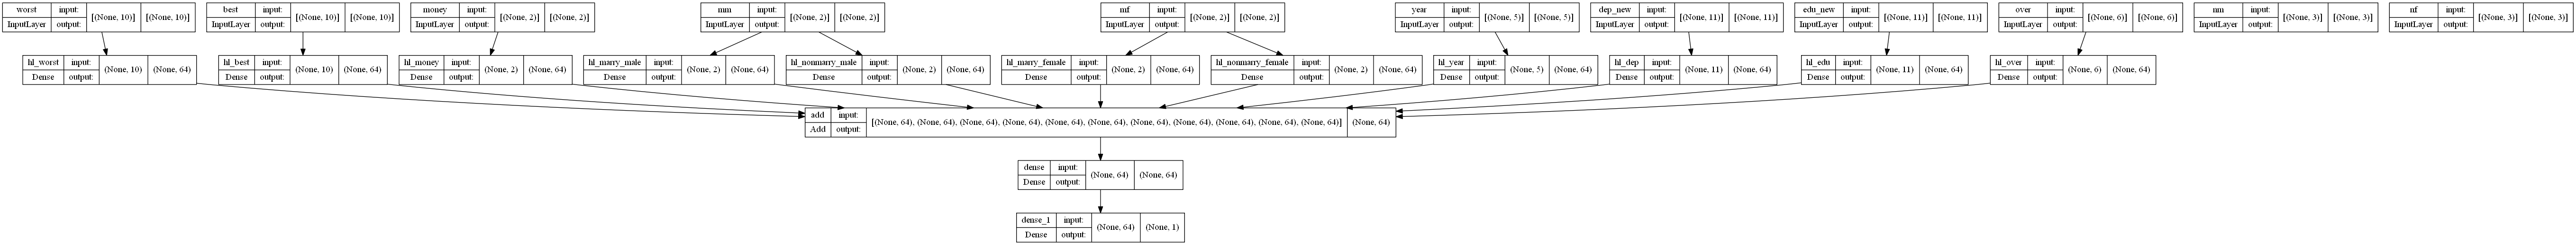

In [57]:
# 모델 시각화
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

### 모델 학습

In [58]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',min_delta=0,patience=30, verbose=1, restore_best_weights=True)

# 얼리스토핑도 잘 거셨슴다. 근데, epoch가 25회일때, patience가 30인 것은 고민을 해보셔야 해용.
# 무슨일이.... '일어나지 않을겁니다'

In [59]:
inpu = [tr_worst, tr_best, tr_money, tr_marry_male, tr_marry_female,
        tr_nonmarry_male, tr_nonmarry_female, tr_year, tr_dep, tr_edu, tr_over]

In [60]:
model.fit(inpu,y_train,validation_split=0.15,epochs=25,verbose=1,callbacks=[es])

Epoch 1/25
27/27 [==============================] - 1s 12ms/step - loss: 0.4437 - accuracy: 0.8400 - val_loss: 0.4044 - val_accuracy: 0.8467
Epoch 2/25
27/27 [==============================] - 0s 3ms/step - loss: 0.4046 - accuracy: 0.8424 - val_loss: 0.3876 - val_accuracy: 0.8467
Epoch 3/25
27/27 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.8435 - val_loss: 0.3895 - val_accuracy: 0.8533
Epoch 4/25
27/27 [==============================] - 0s 3ms/step - loss: 0.3619 - accuracy: 0.8459 - val_loss: 0.3589 - val_accuracy: 0.8467
Epoch 5/25
27/27 [==============================] - 0s 3ms/step - loss: 0.3416 - accuracy: 0.8529 - val_loss: 0.3504 - val_accuracy: 0.8533
Epoch 6/25
27/27 [==============================] - 0s 4ms/step - loss: 0.3305 - accuracy: 0.8671 - val_loss: 0.3429 - val_accuracy: 0.8800
Epoch 7/25
27/27 [==============================] - 0s 3ms/step - loss: 0.3175 - accuracy: 0.8753 - val_loss: 0.3378 - val_accuracy: 0.8933
Epoch 8/25
27/27 [=

In [61]:
'''지금 인풋8을 찾고 있어용. 조금만 기다려주세요-  이름을 줘도 안뜨는걸 보니 또 재밌네용'''

'지금 인풋8을 찾고 있어용. 조금만 기다려주세요-  이름을 줘도 안뜨는걸 보니 또 재밌네용'

### 모델 예측

In [62]:
list = [te_worst, te_best, te_money, te_marry_male, te_marry_female, te_nonmarry_male, te_nonmarry_female, te_year, te_dep, te_edu, te_over]

In [63]:
y_pred = model.predict(list)

y_pred[:12].reshape(-1)

array([0.16834432, 0.8775723 , 0.00609902, 0.8082671 , 0.11320859,
       0.00559825, 0.04070216, 0.08200204, 0.18017182, 0.7804973 ,
       0.12361568, 0.00824147], dtype=float32)

In [64]:
# y_pred값 0 아니면 1로 변환.
for idx, val in enumerate(y_pred) :
    if y_pred[idx] >= 0.5 :
        y_pred[idx] = 1
    else :
        y_pred[idx] = 0

In [65]:
y_pred[:12].reshape(-1)

array([0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
print( classification_report(y_test, y_pred, target_names=['No' , 'Yes']) )

              precision    recall  f1-score   support

          No       0.88      0.94      0.91       207
         Yes       0.59      0.40      0.47        43

    accuracy                           0.85       250
   macro avg       0.73      0.67      0.69       250
weighted avg       0.83      0.85      0.84       250



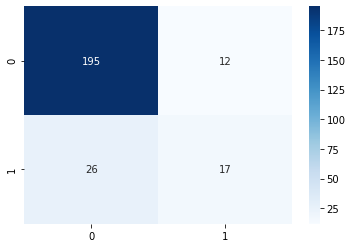

In [68]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, 
cmap='Blues', fmt='g') 
plt.show()

정확도 = 0.85 
예측 정답 정밀도 = 0.59  
실제 이직 재현율 = 0.40

잔류 정답 정밀도 = 0.94

## 평가

1. 모델의 정확도를 기재하시오.
2. 이직이라 예측한 것 중 실제로 이직한 비율을 구하시오.
3. 실제 이직 데이터 중 모델이 이직이라 예측한 것의 비율을 구하시오.
4. 남는다고 예측한 것 중 실제로 남아있는 비율을 구하시오.
---
### hidden layer 2개를 사용한 multilayer perceptron 구조와 비교하시오.

In [69]:
# 1번 세션 클리어
keras.backend.clear_session()

# 2번 모델의 레이어 엮기.
# 히든레이어의 경우 64로 통일함.

# 1번 로컬
il_worst = Input(shape=(10,))
hl_worst = Dense(64, activation='relu',name='hl_worst')(il_worst)

il_best = Input(shape=(10,))
hl_best = Dense(64, activation='relu',name='hl_best')(il_best)

# 2번 로컬
il_money = Input(shape=(2,))
hl_money = Dense(64, activation='relu',name='hl_money')(il_money)

# 3번 로컬
il_marry_male = Input(shape=(2,))
hl_marry_male = Dense(64, activation='relu',name='hl_marry_male')(il_marry_male)

il_marry_female = Input(shape=(2,))
hl_marry_female = Dense(64, activation='relu',name='hl_marry_female')(il_marry_female)

il_nonmarry_male = Input(shape=(3,))
hl_nonmarry_male = Dense(64, activation='relu',name='hl_nonmarry_male')(il_marry_male)

il_nonmarry_female = Input(shape=(3,))
hl_nonmarry_female = Dense(64, activation='relu',name='hl_nonmarry_female')(il_marry_female)

# 4번 로컬
il_year = Input(shape=(5,))
hl_year = Dense(64, activation='relu',name='hl_year')(il_year)

# 5번 로컬
il_dep = Input(shape=(11,))
hl_dep = Dense(64, activation='relu',name='hl_dep')(il_dep)

# 6번 교육
il_edu = Input(shape=(11,))
hl_edu = Dense(64, activation='relu',name='hl_edu')(il_edu)

# 7번 추가근무
il_over = Input(shape=(6,))
hl_over = Dense(64,activation='relu',name='hl_over')(il_over)

In [70]:
al = Add()([hl_worst,hl_best,hl_money,hl_marry_male,hl_marry_female,
            hl_nonmarry_male,hl_nonmarry_female,hl_year,hl_dep,hl_edu,hl_over])

In [71]:
# 전체 변수를 이용한 il 만들기.
hl = Dense(64, activation='relu')(al)
hl = Dense(64, activation='relu')(hl)
hl = Dense(64, activation='relu')(hl)

In [72]:
# 아웃풋 레이어
ol = Dense(1,activation='sigmoid')(hl)

In [73]:
# 모델의 시작과 끝 지정
model = Model([il_worst, il_best, il_money, il_marry_male, il_marry_female, il_nonmarry_male,
              il_nonmarry_female, il_year, il_dep, il_edu, il_over], ol)

In [74]:
# 컴파일
model.compile(loss='binary_crossentropy',metrics='accuracy',optimizer='adam')

In [75]:
inpu = [tr_worst, tr_best, 
        tr_money, 
        tr_marry_male, tr_marry_female, tr_nonmarry_male, tr_nonmarry_female, 
        tr_year, 
        tr_dep, 
        tr_edu, 
        tr_over]

In [76]:
model.fit(inpu,y_train,validation_split=0.15,epochs=25,verbose=1,callbacks=[es])

Epoch 1/25
27/27 [==============================] - 1s 11ms/step - loss: 0.5135 - accuracy: 0.7859 - val_loss: 0.4240 - val_accuracy: 0.8467
Epoch 2/25
27/27 [==============================] - 0s 4ms/step - loss: 0.4284 - accuracy: 0.8424 - val_loss: 0.4168 - val_accuracy: 0.8467
Epoch 3/25
27/27 [==============================] - 0s 4ms/step - loss: 0.4070 - accuracy: 0.8424 - val_loss: 0.3989 - val_accuracy: 0.8467
Epoch 4/25
27/27 [==============================] - 0s 4ms/step - loss: 0.3793 - accuracy: 0.8424 - val_loss: 0.3754 - val_accuracy: 0.8467
Epoch 5/25
27/27 [==============================] - 0s 4ms/step - loss: 0.3560 - accuracy: 0.8518 - val_loss: 0.3754 - val_accuracy: 0.8600
Epoch 6/25
27/27 [==============================] - 0s 4ms/step - loss: 0.3428 - accuracy: 0.8612 - val_loss: 0.3947 - val_accuracy: 0.8133
Epoch 7/25
27/27 [==============================] - 0s 4ms/step - loss: 0.3215 - accuracy: 0.8671 - val_loss: 0.3596 - val_accuracy: 0.8533
Epoch 8/25
27/27 [=

In [79]:
list = [te_worst, te_best, te_money, te_marry_male, te_marry_female, te_nonmarry_male, te_nonmarry_female, te_year, te_dep, te_edu, te_over]

In [80]:
y_pred = model.predict(list)

y_pred[:12].reshape(-1)

array([0.03229558, 0.9947007 , 0.01503977, 0.9935442 , 0.23934513,
       0.00540671, 0.00522482, 0.02448443, 0.07476792, 0.9284812 ,
       0.20000955, 0.02968746], dtype=float32)

In [81]:
# y_pred값 0 아니면 1로 변환.
for idx, val in enumerate(y_pred) :
    if y_pred[idx] >= 0.5 :
        y_pred[idx] = 1
    else :
        y_pred[idx] = 0

In [82]:
print( classification_report(y_test, y_pred, target_names=['No' , 'Yes']) )

              precision    recall  f1-score   support

          No       0.89      0.92      0.90       207
         Yes       0.54      0.47      0.50        43

    accuracy                           0.84       250
   macro avg       0.72      0.69      0.70       250
weighted avg       0.83      0.84      0.84       250



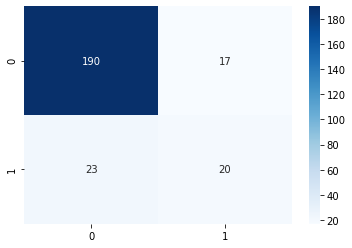

In [83]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, 
cmap='Blues', fmt='g') 
plt.show()

## MLP 결과

정확도 = 0.84
예측 정답 정밀도 = 0.54  
실제 이직 재현율 = 0.47

잔류 정답 정밀도 = 0.92

기존 모델과 비교했을 때  
정확도, 이직 정밀도의 부분은 떨어졌지만,  
이직 재현율과 잔류 정밀도 부분의 성능은 향상된 모습

## 특징 분류

#### 1. 만족도가 높을수록 이직률이 적을거야.
* 근무 환경에 대한 만족도, 직무 적극성, 참여도
* 직무 만족도, 동료와의 관계, 워라밸

#### 2. 경제적으로 안정되면 이직률이 적을거야.
* 월급
* 전년대비 급여 인상율

#### 3. 남성 미혼자, 여성 기혼자일수록 높을거야.
* 성별
* 결혼여부

#### 4. 연수(나이)가 많을수록 이직률이 적을거야.
* 나이, 총 근무 연수, 현 직장 근무 연수, 현 직무 연수
* 현 팀장과 근무 연수

#### 5. 부서별로 이직률이 다를거야.
* 부서, 직무

#### 6. 교육수준이 높을수록 이직률이 높을거야.
* 교육수준, 전공

#### 7. 직무 외 근무가 많을수록 이직률이 높을거야.
* 야근, 출장 빈도, 전년 교육 훈련 횟수